In [ ]:
library(ggplot2)
library(viridis)
library(dplyr)

plotfactors = function(location,exposures){
        exp1 = exposures/rowSums(exposures)
        exp1 = t(t(exp1)/colSums(exp1)) 
        plotdat = data.frame(x = location[,1], y = location[,2], all = exp1)

        datalong = reshape(plotdat, varying = colnames(plotdat)[-c(1,2)], direction = 'long', v.names = "prob")
        datalong$weight = datalong$prob
        qmax = quantile(datalong$weight, 0.95)
        datalong$weight[datalong$prob > qmax] = qmax


        g1 = ggplot(datalong, aes(x = x, y = y, col = weight))+
        geom_point(cex = 0.2)+ 
        facet_wrap(~time, ncol = 5)+ 
        theme(axis.text = element_blank(),
        axis.ticks=element_blank(), 
        axis.title = element_blank(), legend.position = "none")+
        scale_color_viridis()
        
        return(g1)

}

# Batch NMF

# Regular NMF

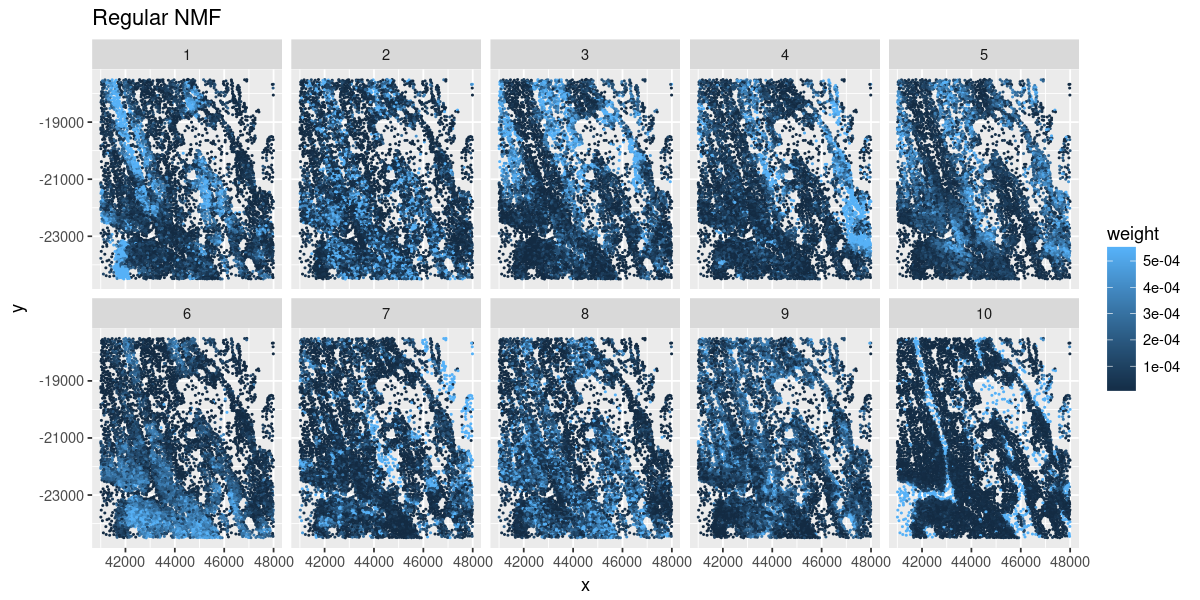

In [ ]:
load("modelssaved/LH_f10_regnmf.RData")

plotfactors(location,out$exposures) + ggtitle("Regular NMF")

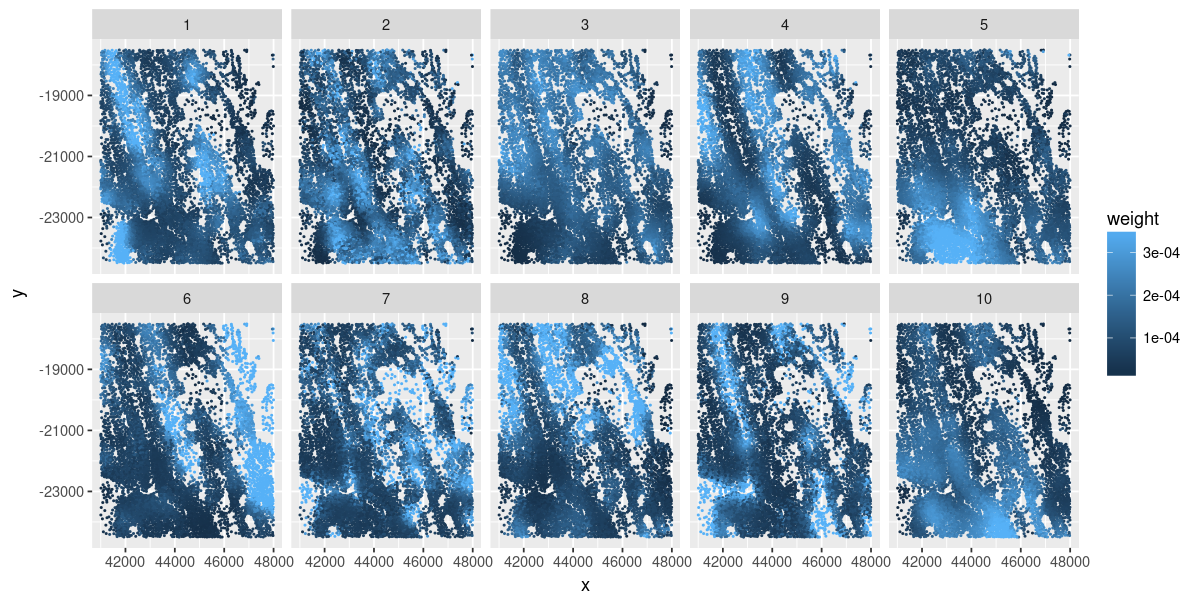

In [ ]:
load("modelssaved/LH_f10_trybatch_500.RData")

plotfactors(location,out$exposures)

# Spatial NMF

In [ ]:

# get the gkl values
gklvalues = c()
i = 1
nrank = c(1:100)
for( x in nrank){
    load(paste0("modelssaved/LH5K_f",x,"_l001.RData"))
    gklvalues[i] = out$gkl
    i = i+1
}

plot(nrank,gklvalues)

Warning message in readChar(con, 5L, useBytes = TRUE):
“cannot open compressed file 'modelssaved/LH5K_f1_l001.RData', probable reason 'No such file or directory'”

ERROR: Error in readChar(con, 5L, useBytes = TRUE): cannot open the connection


In [ ]:


location = read.csv('data/LH_location.csv')
location = location[,-1]
location = as.matrix(location)



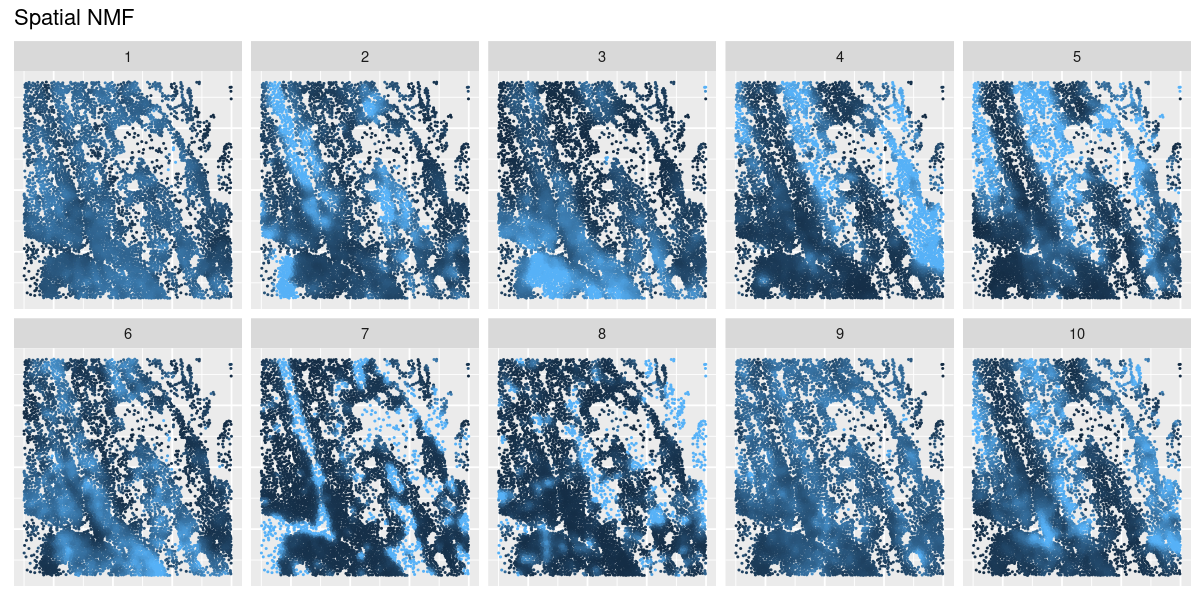

In [ ]:


load("modelssaved/LH5K_f10_l0005.RData")
options(repr.plot.width=10, repr.plot.height=5)
plotfactors(location,out$exposures) + ggtitle("Spatial NMF")